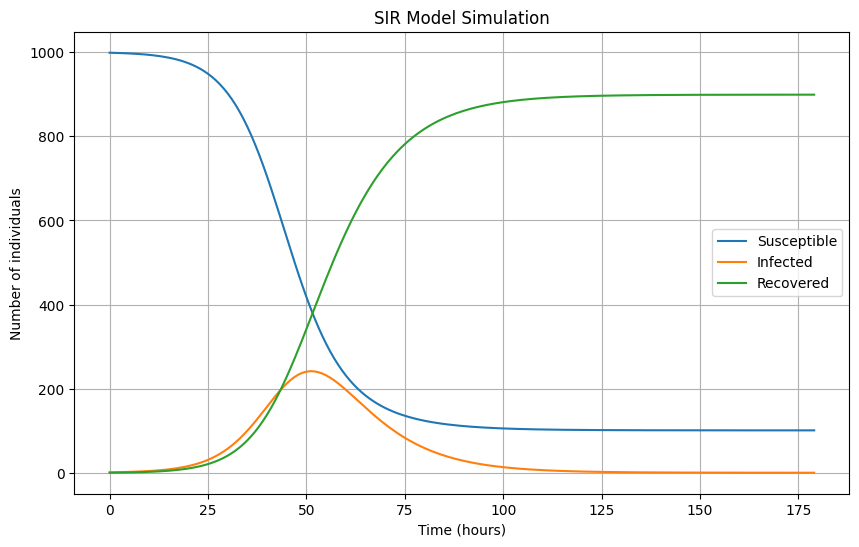

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
N = 1000  # Total population
I0 = 1    # Initial number of infected individuals
S0 = N - I0  # Initial number of susceptible individuals
R0 = 0    # Initial number of recovered individuals
beta = 0.25  # Probability of an infected person infecting a susceptible person per hour
gamma = 0.1  # Probability of an infected person recovering per hour
hours = 180  # Number of hours to simulate

# SIR model
def sir_model(S, I, R, beta, gamma, N):
    new_infected = beta * S * I / N
    new_recovered = gamma * I
    S = S - new_infected
    I = I + new_infected - new_recovered
    R = R + new_recovered
    return S, I, R

# Initialize arrays to store results
S = np.zeros(hours)
I = np.zeros(hours)
R = np.zeros(hours)
S[0] = S0
I[0] = I0
R[0] = R0

# Run simulation
for t in range(1, hours):
    S[t], I[t], R[t] = sir_model(S[t-1], I[t-1], R[t-1], beta, gamma, N)

# Plot results
plt.figure(figsize=(10,6))
plt.plot(S, label='Susceptible')
plt.plot(I, label='Infected')
plt.plot(R, label='Recovered')
plt.xlabel('Time (hours)')
plt.ylabel('Number of individuals')
plt.title('SIR Model Simulation')
plt.legend()
plt.grid(True)
plt.show()


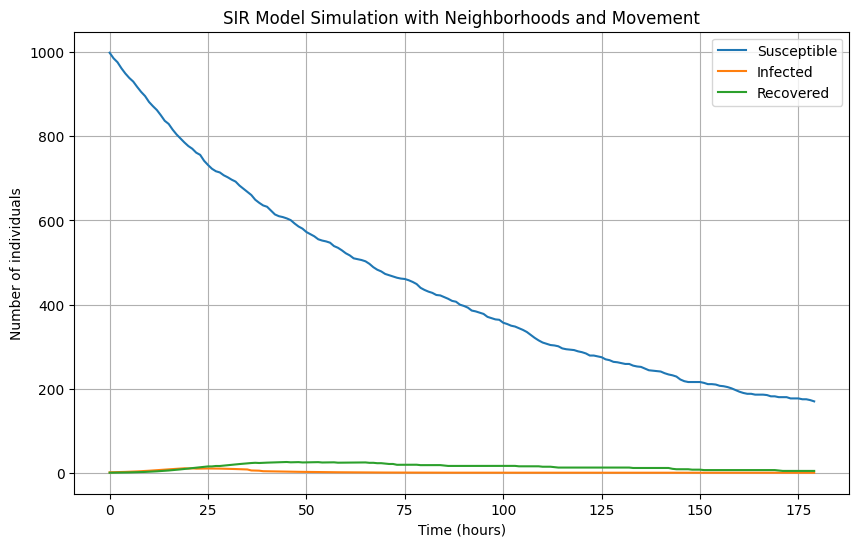

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
N = 1000  # Total population
neighborhoods = 20  # Number of neighborhoods
agents_per_neighborhood = N // neighborhoods
I0 = 1  # Initial number of infected individuals in the first neighborhood
beta = 0.3  # Probability of an infected person infecting a susceptible person per hour
gamma = 0.1  # Probability of an infected person recovering per hour
move_prob = 0.01  # Probability of an agent moving to another neighborhood per hour
hours = 180  # Number of hours to simulate

# Initialize arrays
S = np.zeros((neighborhoods, hours))
I = np.zeros((neighborhoods, hours))
R = np.zeros((neighborhoods, hours))

# Set initial conditions
S[:, 0] = agents_per_neighborhood
I[:, 0] = 0
R[:, 0] = 0
I[0, 0] = I0
S[0, 0] = agents_per_neighborhood - I0

# SIR model for a neighborhood
def sir_model(S, I, R, beta, gamma, N):
    new_infected = beta * S * I / N
    new_recovered = gamma * I
    S = S - new_infected
    I = I + new_infected - new_recovered
    R = R + new_recovered
    return S, I, R

# Run simulation
for t in range(1, hours):
    for n in range(neighborhoods):
        S[n, t], I[n, t], R[n, t] = sir_model(S[n, t-1], I[n, t-1], R[n, t-1], beta, gamma, agents_per_neighborhood)

    # Agent movement
    for n in range(neighborhoods):
        if S[n, t] > 0:
            move_out_S = np.random.binomial(S[n, t], move_prob)
        else:
            move_out_S = 0
        if I[n, t] > 0:
            move_out_I = np.random.binomial(I[n, t], move_prob)
        else:
            move_out_I = 0
        if R[n, t] > 0:
            move_out_R = np.random.binomial(R[n, t], move_prob)
        else:
            move_out_R = 0

        move_in_S = move_out_S // neighborhoods
        move_in_I = move_out_I // neighborhoods
        move_in_R = move_out_R // neighborhoods

        for m in range(neighborhoods):
            if m != n:
                S[m, t] += move_in_S
                I[m, t] += move_in_I
                R[m, t] += move_in_R

        S[n, t] -= move_out_S - (move_in_S * (neighborhoods - 1))
        I[n, t] -= move_out_I - (move_in_I * (neighborhoods - 1))
        R[n, t] -= move_out_R - (move_in_R * (neighborhoods - 1))

# Aggregate results
total_S = np.sum(S, axis=0)
total_I = np.sum(I, axis=0)
total_R = np.sum(R, axis=0)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(total_S, label='Susceptible')
plt.plot(total_I, label='Infected')
plt.plot(total_R, label='Recovered')
plt.xlabel('Time (hours)')
plt.ylabel('Number of individuals')
plt.title('SIR Model Simulation with Neighborhoods and Movement')
plt.legend()
plt.grid(True)
plt.show()
